In [ ]:
!pip install qiskit
!pip install pylatexenc
!pip install qiskit-machine-learning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=90ebce3146a03311d47e671da67db0ce6a869a1744671eb62214cb1b441511d5
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.8/97.8 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from qiskit.circuit.library import PauliFeatureMap
from qiskit_algorithms.optimizers import SPSA
from qiskit.primitives import Sampler
from qiskit.circuit.library import EfficientSU2
from qiskit_machine_learning.algorithms import VQC
from sklearn.metrics import accuracy_score
from qiskit.circuit.library import ZFeatureMap
from qiskit_algorithms.utils import algorithm_globals
from qiskit_machine_learning.kernels import FidelityQuantumKernel,BaseKernel,TrainableKernel
from qiskit_machine_learning.algorithms import PegasosQSVC
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit_algorithms.optimizers import COBYLA, L_BFGS_B
from qiskit_algorithms.utils import algorithm_globals

from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC, QSVC
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN
from qiskit_machine_learning.circuit.library import QNNCircuit
from qiskit.circuit.library import ZFeatureMap
from qiskit_algorithms.utils import algorithm_globals

from qiskit_machine_learning.kernels import FidelityQuantumKernel,BaseKernel,TrainableFidelityQuantumKernel,FidelityStatevectorKernel

algorithm_globals.random_seed = 42

In [ ]:
class QuantumSVM:
    def __init__(self) -> None:
        self.data_path = "/content/oito_sitios.csv"
        annni_dataset = pd.read_csv(self.data_path)
        self.X = annni_dataset.drop(columns=['label','Unnamed: 0','g','k'])
        self.y = annni_dataset['label'] - 1  # Adjust labels to start from 0: [0, 1, 2]
        self.g = annni_dataset['g']
        self.k = annni_dataset['k']

    def process_data(self):
        X_train, X_test, y_train, y_test = train_test_split(self.X , self.y, test_size=0.3, random_state=44)
        scaler = MinMaxScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        return X_train, X_test, y_train, y_test  # Retorna y_train e y_test sem codificação one-hot


    def model_and_score(self):
        X_train, X_test, y_train, y_test = self.process_data()
        num_features = X_train.shape[1]
        feature_map = ZFeatureMap(feature_dimension=num_features, reps=3)
        qkernel = FidelityStatevectorKernel(feature_map=feature_map)
        qsvc = QSVC(quantum_kernel=qkernel)
        qsvc.fit(X_train, y_train)  # Usa y_train sem codificação one-hot
        predictions = qsvc.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)  # Compara com y_test sem codificação one-hot
        print(accuracy)
        return qsvc, accuracy

    def plot_graph(self,modelo):
        scaler = MinMaxScaler()
        X = scaler.fit_transform(self.X)
        predict = modelo.predict(X)
        plt.scatter(self.g,self.k ,c=predict)
        plt.title('Model of ANNNI with QSVC')
        plt.xlabel('k')
        plt.ylabel('g')
        plt.grid()






model = QuantumSVM()
modelo,acuracia = model.model_and_score()

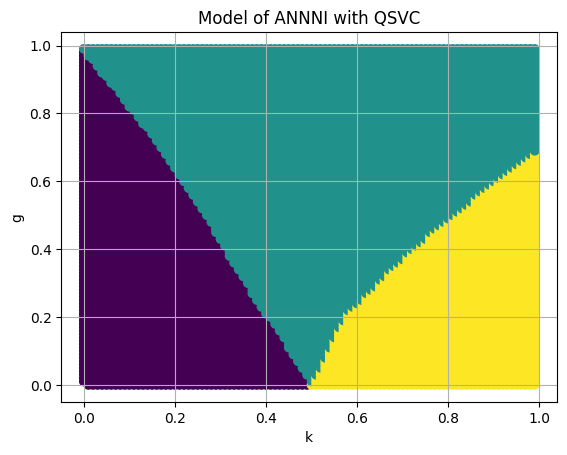

In [ ]:
model.plot_graph(modelo)